In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn as skl
import sklearn.datasets as ds
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
boston_dataset = ds.load_boston()
breast_cancer_dataset = ds.load_breast_cancer()
diabetes_dataset = ds.load_diabetes()
digits_dataset = ds.load_digits()
# files_dataset = ds.load_files()
iris_dataset = ds.load_iris()
linnerud_dataset = ds.load_linnerud()

In [22]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
breast_cancer = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
diabetes = pd.DataFrame(diabetes_dataset.data, columns=diabetes_dataset.feature_names)
# digits = pd.DataFrame(digits_dataset.data, columns=diabetes_dataset.feature_names)
iris = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
linnerud = pd.DataFrame(linnerud_dataset.data, columns=linnerud_dataset.feature_names)

In [15]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
digits_dataset.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [32]:
iris['type of flower'] = iris_dataset.target

In [36]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type of flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [37]:
X = iris_dataset.data
y = iris_dataset.target

In [38]:
lr_iris = LinearRegression()

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, y)

In [41]:
lr_iris.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
lr_iris.coef_

array([-0.10186019, -0.03824276,  0.20323622,  0.65698913])

In [43]:
lr_iris.intercept_

0.15961253627658656

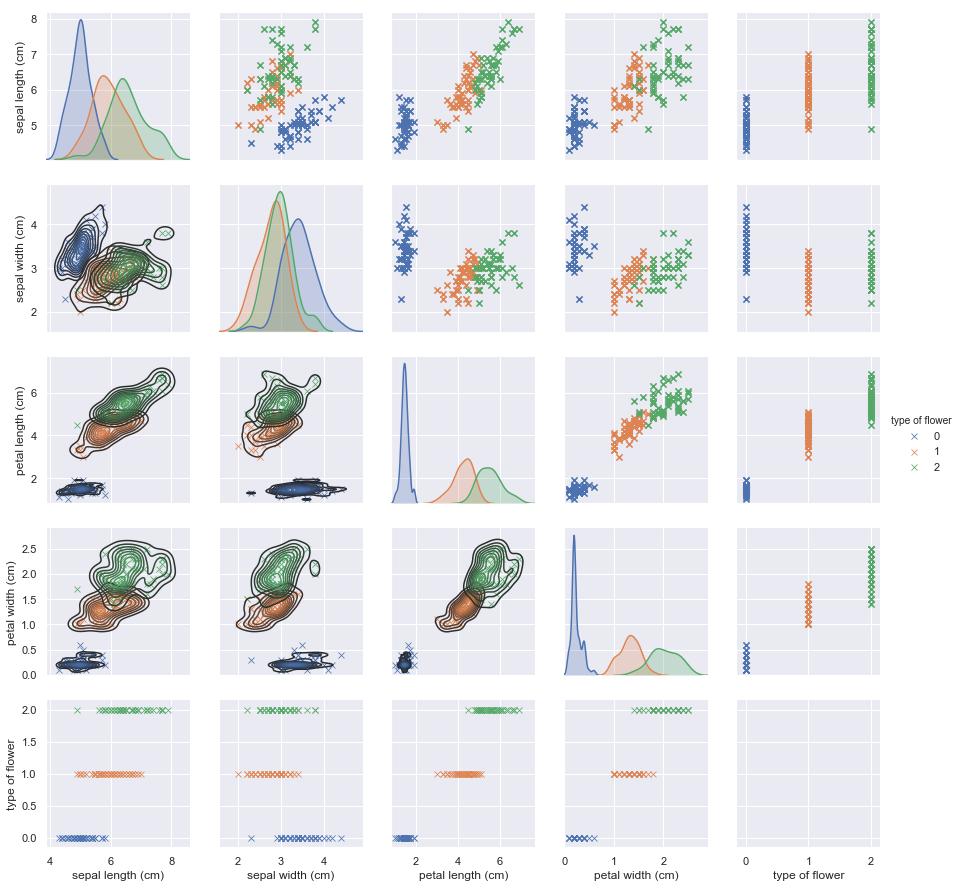

In [54]:
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(8.7,6.27)})
pd.options.display.max_columns=999
g = sns.pairplot(iris, hue='type of flower', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [55]:
lr_iris.singular_

array([21.37580742,  5.14533978,  2.97458368,  1.68065415])

## USA Housing Price

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sklearn as skl
import sklearn.datasets as ds
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [58]:
hp = pd.read_csv('USA_Housing.csv')

In [59]:
hp.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [60]:
lr_hp = LinearRegression()

In [68]:
x = np.array([hp['Avg. Area Income'], hp['Avg. Area House Age'], hp['Avg. Area Number of Rooms'], hp['Avg. Area Number of Bedrooms'], hp['Area Population']])

In [69]:
y = hp['Price']

In [73]:
x = x.T

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [77]:
lr_hp.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
y_train_pred = lr_hp.predict(x_train)

In [80]:
y_test_pred = lr_hp.predict(x_test)

In [81]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))

In [82]:
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

In [83]:
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)